## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [10]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [11, 7]

office_df = pd.read_csv('datasets/office_episodes.csv')

office_df.info()
office_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,2013-04-11,NaN,Matt Sohn,Dan Sterling,False,0.43750
184,184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,2013-04-25,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,False,0.43750
185,185,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2013-05-02,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,True,0.75000
186,186,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,2013-05-09,NaN,David Rogers,Brent Forrester,False,0.90625
187,187,9,Finale,"One year later, Dunder Mifflin employees past ...",9.8,10515,5.69,51,2013-05-16,"Joan Cusack, Ed Begley Jr, Rachel Harris, Nanc...",Ken Kwapis,Greg Daniels,True,1.00000


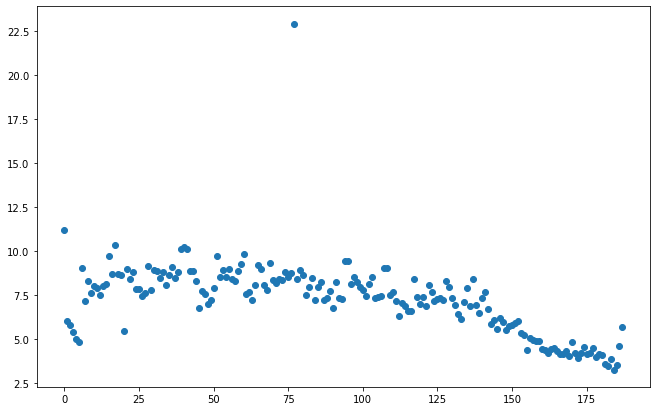

In [11]:
plt.scatter(x=office_df['episode_number'], 
            y=office_df['viewership_mil'])

In [12]:
cols = []

for i, row in office_df.iterrows():
    if row['scaled_ratings'] < 0.25:
        cols.append('red')
    elif row['scaled_ratings'] < 0.5:
        cols.append('orange')
    elif row['scaled_ratings'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')
        
print(cols[-1:-5:-1])

['darkgreen', 'darkgreen', 'darkgreen', 'orange']


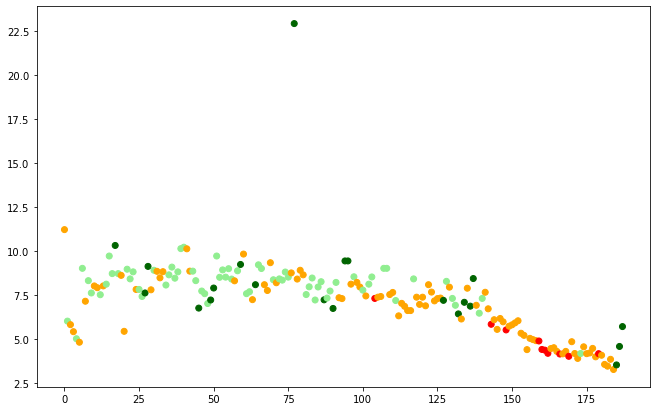

In [14]:
plt.scatter(x=office_df['episode_number'], 
            y=office_df['viewership_mil'],
           c=cols)

In [30]:
sizes = []

for i, row in office_df.iterrows():
    if row['has_guests']: sizes.append(250)
    else: sizes.append(25)

sizes[-1:-5:-1]

[250, 25, 250, 25]

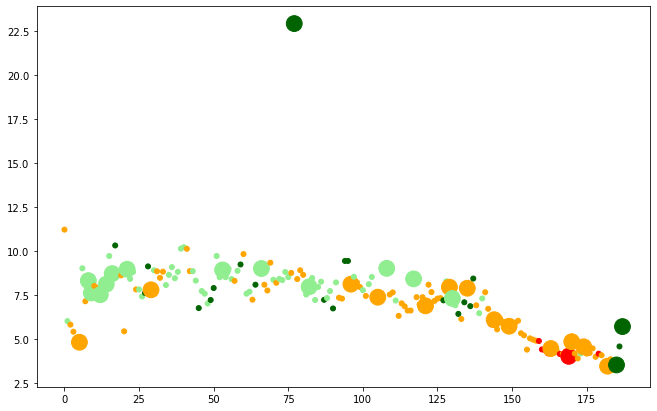

In [15]:
plt.scatter(x=office_df['episode_number'], 
            y=office_df['viewership_mil'], 
            c=cols, 
            s=sizes)

Text(0, 0.5, 'Viewership (Millions)')

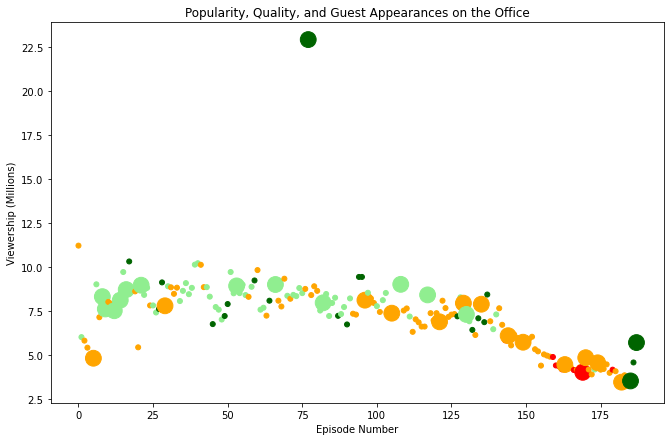

In [16]:
plt.scatter(x=office_df['episode_number'], 
            y=office_df['viewership_mil'], 
            c=cols, 
            s=sizes)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

Text(0, 0.5, 'Viewership (Millions)')

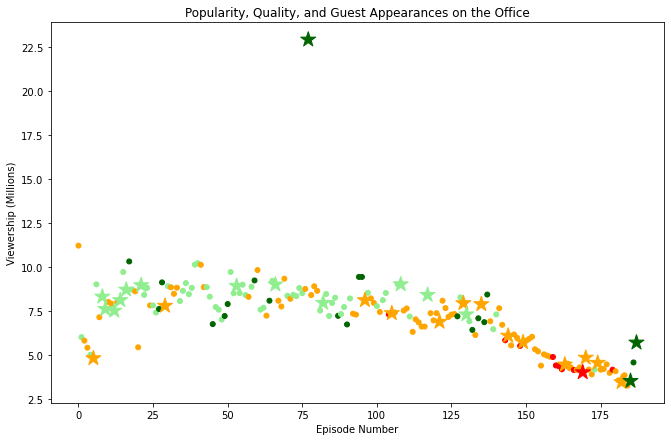

In [41]:
office_df['sizes'] = sizes
office_df['cols'] = cols
non_guest_df = office_df[office_df['has_guests'] == False]
guest_df = office_df[office_df['has_guests'] == True]

plt.scatter(x = non_guest_df['episode_number'],
            y = non_guest_df['viewership_mil'],
            c = non_guest_df['cols'],
            s = non_guest_df['sizes'])

plt.scatter(x = guest_df['episode_number'],
            y = guest_df['viewership_mil'],
            c = guest_df['cols'],
            s = guest_df['sizes'],
            marker = '*')

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

In [20]:
office_df[office_df['viewership_mil'] == office_df['viewership_mil'].max()]['guest_stars']

top_star = "Jessica Alba"
